In [136]:
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

import xgboost as xgb
import xgboost as XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
import copy

from Standard_functions import fit_score_pred, kfold_val_fit_score_pred_log, get_user_split_data
from sklearn.metrics import f1_score
import warnings
from tqdm import tqdm

warnings.filterwarnings('always')
np.seterr(divide='ignore', invalid='ignore')
%matplotlib inline

In [19]:
os.chdir('../Data/')

# Full Features Logistic
solver='liblinear',penalty='l1',C=11250

In [3]:
df = pd.read_pickle('full_features')

In [4]:
rs = np.random.RandomState(101)

total_users = df['user_id'].unique()
small_df_users = rs.choice(total_users, 
               size=int(total_users.shape[0] * .005), 
               replace=False)

df = df[df['user_id'].isin(small_df_users)]

In [5]:
X = df.drop(['product_id','user_id',
                      'latest_cart','in_cart'],axis=1) 
y = df['in_cart']


In [6]:
lr = LogisticRegression()

In [21]:
param_grid = {
    'C': np.linspace(10500,11500,10),
    'penalty': ['l1'],
    'solver': ['liblinear']
}
grid = GridSearchCV(lr,param_grid=param_grid, cv=10)
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([10500.     , 10611.11111, 10722.22222, 10833.33333, 10944.44444,
       11055.55556, 11166.66667, 11277.77778, 11388.88889, 11500.     ]), 'penalty': ['l1'], 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
grid.best_params_

{'C': 11277.777777777777, 'penalty': 'l1', 'solver': 'liblinear'}

In [23]:
df = pd.read_pickle('full_features')

In [5]:
X_tr, X_val, y_tr, y_val = get_user_split_data(df)

In [7]:

"""    
Takes a DataFrame, training, and validation data as its input.
Returns Seaborn Pairplot, f1-score, features and their coefficients, and predicted non-re-orders and re-orders.
"""

# Note that plot_features already removes 'product_id','user_id',
# and 'latest_cart' so we don't need to do it for that function.

reduced_df = df.drop(['product_id','user_id',
                    'latest_cart','in_cart'],axis=1)



features = reduced_df.columns

lr = LogisticRegression(solver='liblinear',penalty='l1',C=11250)
lr.fit(X_tr, y_tr)
vals = pd.DataFrame(lr.predict(X_val))[0].value_counts()
coefs = [round(x,4) for x in lr.coef_.tolist()[0]]
print('Our f1-score is',f1_score(lr.predict(X_val), y_val))
print('The coefficients are: \n',
      pd.DataFrame(list(zip(features,coefs)),
            columns=['Features','Coefficients']))
print('And we\'ve predicted',vals[0],'non-re-orders and',
vals[1],'re-orders.')

Our f1-score is 0.2904841402337229
The coefficients are: 
                                        Features  Coefficients
0                     num_ord_per_user_per_prod        0.0290
1                          product_total_orders        0.0489
2                 product_avg_add_to_cart_order       -0.1194
3                             user_total_orders        0.0107
4                             user_avg_cartsize        0.0257
5                           user_total_products       -0.0026
6               user_avg_days_since_prior_order        0.0007
7            user_product_avg_add_to_cart_order       -0.0019
8                       user_product_order_freq        1.5766
9      number_orders_since_product_last_ordered       -0.0991
10              percent_of_time_product_ordered       -4.1319
11               mean_order_hour_of_day_by_user        0.0136
12  diff_between_average_and_current_order_time       -0.0035
13                             max_order_number       -0.0000
14         

In [14]:
import pickle

with open("../Models/test_model.pkl", "wb") as f:
    pickle.dump(lr, f)

In [15]:
with open("../Models/test_model.pkl", 'rb') as file:  
    test = pickle.load(file)

In [34]:
plot_fit_score_pred(df, X_tr, X_val, y_tr, y_val)

Our f1-score is 0.26621437503499507
The coefficients are: 
                                        Features  Coefficients
0                     num_ord_per_user_per_prod       -0.0015
1                          product_total_orders        0.0530
2                 product_avg_add_to_cart_order       -0.0966
3                             user_total_orders        0.0115
4                             user_avg_cartsize        0.0284
5                           user_total_products       -0.0028
6               user_avg_days_since_prior_order       -0.0031
7            user_product_avg_add_to_cart_order       -0.0048
8                       user_product_order_freq        1.6560
9      number_orders_since_product_last_ordered       -0.0971
10              percent_of_time_product_ordered       -3.9957
11               mean_order_hour_of_day_by_user       -0.0016
12  diff_between_average_and_current_order_time       -0.0065
13                             max_order_number       -0.0000
14        

# Full Features After Scaling
'C': 11388.888888888889, 'penalty': 'l1', 'solver': 'liblinear'

In [23]:
df = pd.read_pickle('full_features_scaled_train')

In [24]:
rs = np.random.RandomState(101)

total_users = df['user_id'].unique()
small_df_users = rs.choice(total_users, 
               size=int(total_users.shape[0] * .005), 
               replace=False)

df = df[df['user_id'].isin(small_df_users)]

In [25]:
lr = LogisticRegression()

In [26]:
X = df.drop(['product_id','user_id',
                      'latest_cart','in_cart'],axis=1) 
y = df['in_cart']

In [27]:
param_grid = {
    'C': np.linspace(10500,11500,10),
    'penalty': ['l1'],
    'solver': ['liblinear','saga']
}
grid = GridSearchCV(lr,param_grid=param_grid, cv=10)
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([10500.     , 10611.11111, 10722.22222, 10833.33333, 10944.44444,
       11055.55556, 11166.66667, 11277.77778, 11388.88889, 11500.     ]), 'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
grid.best_params_

{'C': 10611.111111111111, 'penalty': 'l1', 'solver': 'liblinear'}

In [29]:
df = pd.read_pickle('full_features_scaled_train')

In [48]:
def plot_fit_score_pred(df, X_tr, X_val, y_tr, y_val):
    """    
    Takes a DataFrame, training, and validation data as its input.
    Returns Seaborn Pairplot, f1-score, features and their coefficients, and predicted non-re-orders and re-orders.
    """
    
    # Note that plot_features already removes 'product_id','user_id',
    # and 'latest_cart' so we don't need to do it for that function.
    
    reduced_df = df.drop(['product_id','user_id',
                        'latest_cart','in_cart'],axis=1)
    

    
    features = reduced_df.columns
    
    lr = LogisticRegression(solver='liblinear',penalty='l1',C=10611)
    lr.fit(X_tr, y_tr)
    vals = pd.DataFrame(lr.predict(X_val))[0].value_counts()
    coefs = [round(x,4) for x in lr.coef_.tolist()[0]]
    print('Our f1-score is',f1_score(lr.predict(X_val), y_val))
    print('The coefficients are: \n',
          pd.DataFrame(list(zip(features,coefs)),
                columns=['Features','Coefficients']))
    print('And we\'ve predicted',vals[0],'non-re-orders and',
    vals[1],'re-orders.')

In [49]:
X_tr, X_val, y_tr, y_val = get_user_split_data(df)
plot_fit_score_pred(df, X_tr, X_val, y_tr, y_val)

0it [00:00, ?it/s]

Our f1-score is 0.2667406602528529
The coefficients are: 
                                        Features  Coefficients
0                     num_ord_per_user_per_prod       -0.0074
1                          product_total_orders        0.0530
2                 product_avg_add_to_cart_order       -0.0966
3                             user_total_orders        0.0109
4                             user_avg_cartsize        0.0283
5                           user_total_products       -0.0028
6               user_avg_days_since_prior_order       -0.0033
7            user_product_avg_add_to_cart_order       -0.0049
8                       user_product_order_freq        1.5781
9      number_orders_since_product_last_ordered       -0.0969
10              percent_of_time_product_ordered       -3.9033
11               mean_order_hour_of_day_by_user       -0.0015
12  diff_between_average_and_current_order_time       -0.0065
13                          recent_order_weight        6.7971
And we've p

0it [00:00, ?it/s]

# Scaled Polynomial Features Logistic

In [3]:
df = pd.read_pickle('full_features_scaled_poly_train')

In [4]:
rs = np.random.RandomState(101)

total_users = df['user_id'].unique()
small_df_users = rs.choice(total_users, 
               size=int(total_users.shape[0] * .005), 
               replace=False)

df = df[df['user_id'].isin(small_df_users)]

In [5]:
X = df.drop(['product_id','user_id',
                      'latest_cart','in_cart'],axis=1) 
y = df['in_cart']

In [6]:
lr = LogisticRegression()

In [ ]:
param_grid = {
    'C': np.linspace(1,10000,5),
    'penalty': ['l1'],
    'solver': ['liblinear']
}
grid = GridSearchCV(lr,param_grid=param_grid, cv=10)
grid.fit(X,y)

In [ ]:
grid.best_params_

In [6]:
def plot_fit_score_pred(df, X_tr, X_val, y_tr, y_val):
    """    
    Takes a DataFrame, training, and validation data as its input.
    Returns Seaborn Pairplot, f1-score, features and their coefficients, and predicted non-re-orders and re-orders.
    """
    
    # Note that plot_features already removes 'product_id','user_id',
    # and 'latest_cart' so we don't need to do it for that function.
    
    reduced_df = df.drop(['product_id','user_id',
                        'latest_cart','in_cart'],axis=1)
    

    
    features = reduced_df.columns
    
    lr = LogisticRegression(solver='liblinear',penalty='l1',C=11250)
    lr.fit(X_tr, y_tr)
    vals = pd.DataFrame(lr.predict(X_val))[0].value_counts()
    coefs = [round(x,4) for x in lr.coef_.tolist()[0]]
    print('Our f1-score is',f1_score(lr.predict(X_val), y_val))
    print('The coefficients are: \n',
          pd.DataFrame(list(zip(features,coefs)),
                columns=['Features','Coefficients']))
    print('And we\'ve predicted',vals[0],'non-re-orders and',
    vals[1],'re-orders.')

In [29]:
df = pd.read_pickle('full_features_scaled_train')

In [31]:
X_tr, X_val, y_tr, y_val = get_user_split_data(df)
plot_fit_score_pred(df, X_tr, X_val, y_tr, y_val)

Our f1-score is 0.2667238581898883
The coefficients are: 
                                        Features  Coefficients
0                     num_ord_per_user_per_prod       -0.7238
1                          product_total_orders        1.0214
2                 product_avg_add_to_cart_order       -4.8931
3                             user_total_orders        1.0589
4                             user_avg_cartsize        1.9556
5                           user_total_products       -2.0093
6               user_avg_days_since_prior_order       -0.0934
7            user_product_avg_add_to_cart_order       -0.7017
8                       user_product_order_freq        1.6027
9      number_orders_since_product_last_ordered       -9.4602
10              percent_of_time_product_ordered       -3.9432
11               mean_order_hour_of_day_by_user        0.0165
12  diff_between_average_and_current_order_time       -0.2233
13                          recent_order_weight        6.7090
And we've p

# Full Features Random Forest
'max_depth': 4,
 'max_leaf_nodes': 42,
 'min_samples_leaf': 12,
 'min_samples_split': 2,
 'n_estimators': 33

In [53]:
df = pd.read_pickle('full_features_train')

In [54]:
rs = np.random.RandomState(101)

total_users = df['user_id'].unique()
small_df_users = rs.choice(total_users, 
               size=int(total_users.shape[0] * .05), 
               replace=False)

df = df[df['user_id'].isin(small_df_users)]

In [55]:
rfc = RandomForestClassifier(n_jobs=4,random_state=42)

In [56]:
X = df.drop(['product_id','user_id',
                      'latest_cart','in_cart'],axis=1) 
y = df['in_cart']

In [81]:
param_grid = {
    'n_estimators': [33],
    'max_depth': [4],
    'max_leaf_nodes': [42],
    'min_samples_split': [2],
    'min_samples_leaf': [12]
}
grid = GridSearchCV(rfc,param_grid=param_grid, cv=10)
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=4,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [33], 'max_depth': [4], 'max_leaf_nodes': [42], 'min_samples_split': [2], 'min_samples_leaf': range(2, 13, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [82]:
grid.best_params_

{'max_depth': 4,
 'max_leaf_nodes': 42,
 'min_samples_leaf': 12,
 'min_samples_split': 2,
 'n_estimators': 33}

In [88]:
df = pd.read_pickle('full_features_train')

In [109]:
def plot_fit_score_pred(df, X_tr, X_val, y_tr, y_val):
    """    
    Takes a DataFrame, training, and validation data as its input.
    Returns Seaborn Pairplot, f1-score, features and their coefficients, and predicted non-re-orders and re-orders.
    """
    
    # Note that plot_features already removes 'product_id','user_id',
    # and 'latest_cart' so we don't need to do it for that function.
    
    reduced_df = df.drop(['product_id','user_id',
                        'latest_cart','in_cart'],axis=1)
    
    
    features = reduced_df.columns
    
    rfc = RandomForestClassifier(n_estimators=10)
    rfc.fit(X_tr, y_tr)
    vals = pd.DataFrame(rfc.predict(X_val))[0].value_counts()
    print('Our f1-score is',f1_score(rfc.predict(X_val), y_val))
    print('And we\'ve predicted',vals[0],'non-re-orders and',
    vals[1],'re-orders.')

In [110]:
X_tr, X_val, y_tr, y_val = get_user_split_data(df)
plot_fit_score_pred(df, X_tr, X_val, y_tr, y_val)

Our f1-score is 0.24203591482737533
And we've predicted 1647143 non-re-orders and 48591 re-orders.


In [113]:
df.user_id.nunique()

131209

In [114]:
train_df = pd.read_pickle('full_features_scaled_poly_train')
test_df = pd.read_pickle('full_features_scaled_poly_test')

In [115]:
train_df.head()

,product_id,latest_cart,in_cart,user_id,0,1,2,3,4,5,...,110,111,112,113,114,115,116,117,118,119
0,1,{42475},0,138,0.0,0.010204,0.575850,0.092343,0.302083,0.052347,...,0.000997,0.019802,0.560615,0.001723,0.303338,0.698951,0.034624,0.000918,0.575891,0.002978
1,907,{42475},0,138,0.0,0.010204,0.582685,0.051026,0.302083,0.052347,...,0.000997,0.019802,0.560615,0.000574,0.303338,0.698951,0.011541,0.000918,0.576588,0.000331
2,1000,{42475},0,138,0.0,0.000000,0.602108,0.163528,0.302083,0.052347,...,0.000000,0.000000,0.561185,0.000000,0.303338,0.698951,0.000000,0.000918,0.576936,0.000000
3,3265,{42475},0,138,0.0,0.000000,0.655888,0.101653,0.302083,0.052347,...,0.000000,0.000000,0.561185,0.000000,0.303338,0.698951,0.000000,0.000918,0.576936,0.000000
4,4913,{42475},0,138,0.0,0.000000,0.524920,0.087205,0.302083,0.052347,...,0.000000,0.000000,0.561185,0.000000,0.303338,0.698951,0.000000,0.000918,0.576936,0.000000


In [116]:
test_df.head()

,product_id,user_id,0,1,2,3,4,5,6,7,...,110,111,112,113,114,115,116,117,118,119
0,1,764,0.0,0.010204,0.57585,0.134631,0.000000,0.318841,0.048287,0.364957,...,0.113390,0.212327,0.536931,0.103082,0.290000,0.657656,0.201863,0.018098,0.534943,0.093711
1,1,825,0.0,0.000000,0.57585,0.134631,0.062500,0.046377,0.023364,0.756667,...,0.000000,0.000000,0.566558,0.000000,0.492267,0.818066,0.000000,0.022702,0.563581,0.000000
2,1,910,0.0,0.000000,0.57585,0.134631,0.093750,0.011594,0.017134,0.256140,...,0.000000,0.000000,0.566558,0.000000,0.318107,0.666221,0.000000,0.012491,0.563581,0.000000
3,1,1379,0.0,0.000000,0.57585,0.134631,0.072917,0.020870,0.028037,0.589474,...,0.000000,0.000000,0.566558,0.000000,0.296529,0.679793,0.000000,0.007754,0.563581,0.000000
4,1,1480,0.0,0.020408,0.57585,0.134631,0.416667,0.062690,0.079439,0.282373,...,0.002208,0.027634,0.568775,0.003729,0.251304,0.755824,0.048814,0.005207,0.567563,0.006299


## Gaussian Naive Bayes

In [68]:
df = pd.read_pickle('full_features_with_dep')

In [69]:
X_tr, X_val, y_tr, y_val = get_user_split_data(df)

In [70]:
clf = GaussianNB(var_smoothing=1e-9)
clf.fit(X_tr, y_tr)
probabilities = clf.predict_proba(X_val)[:,1]


In [71]:
roc_auc_score(y_val,probabilities)

0.7950174703006965

In [72]:
fpr, tpr, thresholds = roc_curve(y_val,probabilities)

ROC AUC score =  0.7950174703006965


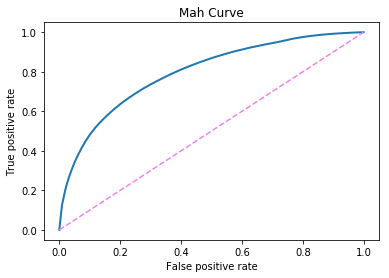

In [73]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Mah Curve');
print("ROC AUC score = ", roc_auc_score(y_val, probabilities))

In [56]:
lr = LogisticRegression(solver='liblinear',C=10611)
lr.fit(X_tr, y_tr)
probabilities = clf.predict_proba(X_val)[:,1]

In [57]:
fpr, tpr, thresholds = roc_curve(y_val,probabilities)

ROC AUC score =  0.7950174703006965


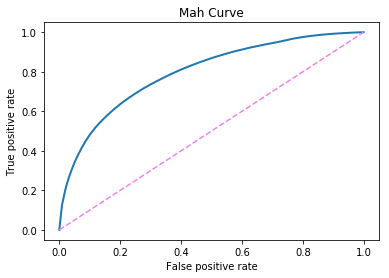

In [58]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Mah Curve');
print("ROC AUC score = ", roc_auc_score(y_val, probabilities))

## Messing with thresholds

In [130]:
df = pd.read_pickle('full_features_with_dep')

In [131]:
X_tr, X_val, y_tr, y_val = get_user_split_data(df)

In [132]:
clf = GaussianNB(var_smoothing=1e-9)
clf.fit(X_tr, y_tr)
probabilities = clf.predict_proba(X_val)[:,1]


In [133]:
roc_auc_score(y_val,probabilities)

0.7950174703006965

In [134]:
fpr, tpr, thresholds = roc_curve(y_val,probabilities)

In [137]:
probs = pd.DataFrame(probabilities)
probs.columns = ['score']
test = copy.deepcopy(probs)

In [140]:

conditions = [
    (test.score > 0.5),
    (test.score < 0.5)
]
choices = [1,0]
test.score = np.select(conditions, choices)

In [141]:
f1_score(y_val,test)

0.40047800190876326

In [ ]:
test.head()

In [ ]:
threshold = np.linspace(.2,.5,100)
dict_thresholdf1 = dict()

for i in threshold:
    test = copy.deepcopy(probs)
    conditions = [
    (test.score > i),
    (test.score < i)
    ]
    choices = [1,0]
    test.score = np.select(conditions, choices)
    dict_thresholdf1[i] = f1_score(y_val,test)

dict_thresholdf1